# MHW Analysis

Calculations for section ___ of the paper

In [1]:
import os

import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature

In [8]:
REPO_ROOT = '/Users/rwegener/repos/chesapeake_mhw'
SAVE_FIGS = True

## Open Datasets

In [3]:
data_dir = os.path.join(REPO_ROOT, 'data/processed/mhw_stats_outputs')
no_occ_da = xr.open_dataset(
    os.path.join(data_dir, 'no_occurrences_CBay_geopolar.nc')
    ).total_no_occurrences

avg_dur_da = xr.open_dataset(
    os.path.join(data_dir, 'average_mhw_duration_CBay_geopolar.nc')
    ).avg_duration

avg_max_int_da = xr.open_dataset(
    os.path.join(data_dir, 'average_max_intensity_CBay_geopolar.nc')
    ).avg_max_intensity

avg_rate_on_da = xr.open_dataset(
    os.path.join(data_dir, 'average_rate_onset_CBay_geopolar.nc')
    ).avg_onset_rate

avg_rate_off_da = xr.open_dataset(
    os.path.join(data_dir, 'average_rate_decline_CBay_geopolar.nc')
    ).avg_decline_rate

avg_annual_events_da = xr.open_dataset(
    os.path.join(data_dir, 'average_no_annual_events_CBay_geopolar.nc')
    ).avg_no_annual_events

avg_cum_intensity_da = xr.open_dataset(
    os.path.join(data_dir, 'average_cum_intensity_CBay_geopolar.nc')
    ).avg_cum_intensity

## A Big Group Photo

Plotting all the characteristics together

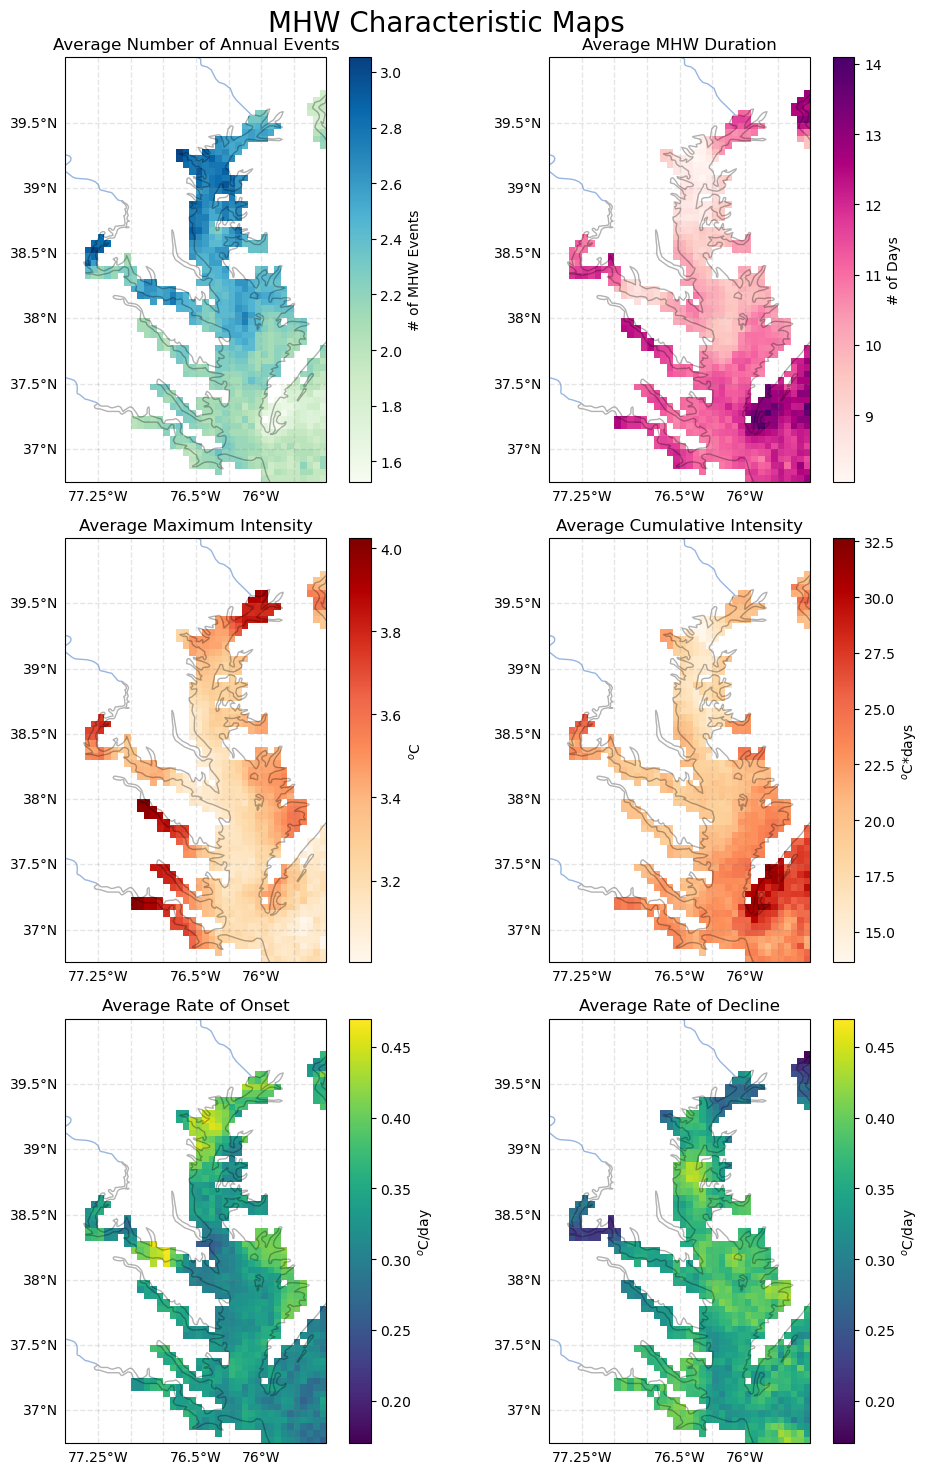

In [9]:
fig, axes = plt.subplots(3, 2, subplot_kw={'projection': ccrs.PlateCarree()})

fig.set_size_inches(10, 15)
fig.suptitle('MHW Characteristic Maps', size=20)

# Add background features
for ax in axes.flatten():
    ax.add_feature(cfeature.COASTLINE, alpha=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.RIVERS)

    # Add and format gridlines. Remove top and right labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.2, linestyle='--')
    gl.top_labels, gl.right_labels = False, False

# no. of annual events and duration
cbar_unit = '# of MHW Events'
avg_annual_events_da.plot(ax=axes[0, 0], cmap='GnBu', cbar_kwargs={'label': cbar_unit},)
axes[0, 0].set_title('Average Number of Annual Events')
cbar_unit = '# of Days'
avg_dur_da.plot(ax=axes[0, 1], cmap='RdPu', cbar_kwargs={'label': cbar_unit},)
axes[0, 1].set_title('Average MHW Duration')

# Average maximum intensity and cumulative intensity
cbar_unit = '$^o$C'
avg_max_int_da.plot(ax=axes[1, 0], cmap='OrRd', cbar_kwargs={'label': cbar_unit},)
axes[1, 0].set_title('Average Maximum Intensity')
cbar_unit = '$^o$C*days'
avg_cum_intensity_da.plot(ax=axes[1, 1], cmap='OrRd', cbar_kwargs={'label': cbar_unit},)
axes[1, 1].set_title('Average Cumulative Intensity')

# rate of onset and rate of decline
cbar_unit = '$^o$C/day'
vmin, vmax = 0.17, 0.47
avg_rate_on_da.plot(ax=axes[2, 0], cbar_kwargs={'label': cbar_unit}, vmin=vmin, vmax=vmax)
axes[2, 0].set_title('Average Rate of Onset')
cbar_unit = '$^o$C/day'
avg_rate_off_da.plot(ax=axes[2, 1], cbar_kwargs={'label': cbar_unit}, vmin=vmin, vmax=vmax)
axes[2, 1].set_title('Average Rate of Decline')

fig.tight_layout()

if SAVE_FIGS:
    plt.savefig('../figures/mhw_maps/all_characteristics.png', dpi=400, 
                bbox_inches='tight')


### A Smaller Group Photo

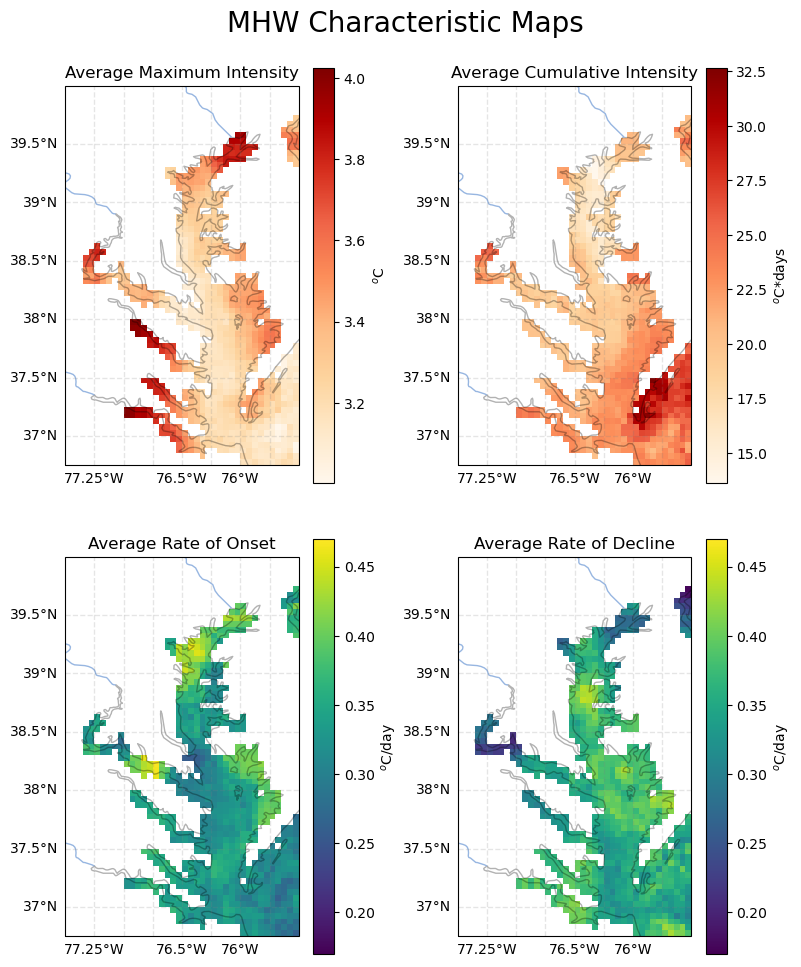

In [10]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': ccrs.PlateCarree()})

fig.set_size_inches(8, 10)
fig.suptitle('MHW Characteristic Maps', size=20)

# Add background features
for ax in axes.flatten():
    ax.add_feature(cfeature.COASTLINE, alpha=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.RIVERS)

    # Add and format gridlines. Remove top and right labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.2, linestyle='--')
    gl.top_labels, gl.right_labels = False, False

# # no. of annual events and duration
# cbar_unit = '# of MHW Events'
# avg_annual_events_da.plot(ax=axes[0, 0], cmap='GnBu', cbar_kwargs={'label': cbar_unit},)
# axes[0, 0].set_title('Average Number of Annual Events')
# cbar_unit = '# of Days'
# avg_dur_da.plot(ax=axes[0, 1], cmap='RdPu', cbar_kwargs={'label': cbar_unit},)
# axes[0, 1].set_title('Average MHW Duration')

# Average maximum intensity and cumulative intensity
cbar_unit = '$^o$C'
avg_max_int_da.plot(ax=axes[0, 0], cmap='OrRd', cbar_kwargs={'label': cbar_unit},)
axes[0, 0].set_title('Average Maximum Intensity')
cbar_unit = '$^o$C*days'
avg_cum_intensity_da.plot(ax=axes[0, 1], cmap='OrRd', cbar_kwargs={'label': cbar_unit},)
axes[0, 1].set_title('Average Cumulative Intensity')

# rate of onset and rate of decline
cbar_unit = '$^o$C/day'
vmin, vmax = 0.17, 0.47
avg_rate_on_da.plot(ax=axes[1, 0], cbar_kwargs={'label': cbar_unit}, vmin=vmin, vmax=vmax)
axes[1, 0].set_title('Average Rate of Onset')
cbar_unit = '$^o$C/day'
avg_rate_off_da.plot(ax=axes[1, 1], cbar_kwargs={'label': cbar_unit}, vmin=vmin, vmax=vmax)
axes[1, 1].set_title('Average Rate of Decline')

fig.tight_layout()

if SAVE_FIGS:
    plt.savefig('../figures/mhw_maps/all_characteristics.png', dpi=400, 
                bbox_inches='tight')
